In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('archive/stocks/A.csv')

print(df.head())


         Date       Open       High        Low      Close  Adj Close    Volume
0  1999-11-18  32.546494  35.765381  28.612303  31.473534  27.068665  62546300
1  1999-11-19  30.713520  30.758226  28.478184  28.880543  24.838577  15234100
2  1999-11-22  29.551144  31.473534  28.657009  31.473534  27.068665   6577800
3  1999-11-23  30.400572  31.205294  28.612303  28.612303  24.607880   5975600
4  1999-11-24  28.701717  29.998211  28.612303  29.372318  25.261524   4843200


In [3]:
df['Target'] = df['Close'].shift(-1)

df = df.dropna()

features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Target']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [33]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [34]:
gb_preds = gb_model.predict(X_test)

Gradient Boosting R² score: 0.8097073717506261
Gradient Boosting RMSE: 5.436485744259694


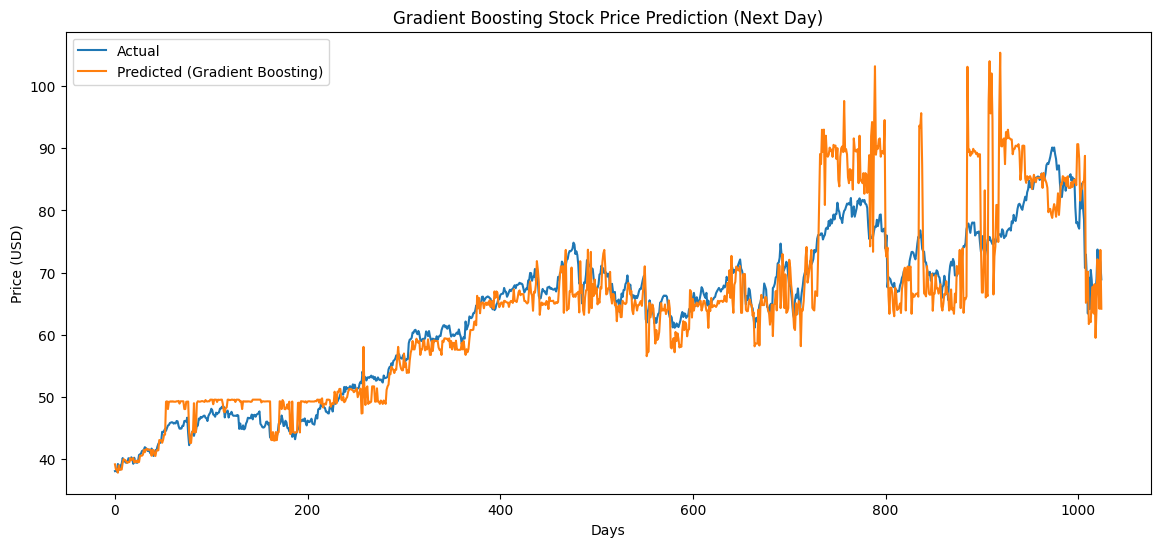

In [35]:
print("Gradient Boosting R² score:", r2_score(y_test, gb_preds))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_preds)))


plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(gb_preds, label='Predicted (Gradient Boosting)')
plt.title('Gradient Boosting Stock Price Prediction (Next Day)')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()